### Decision Tree Company Sales

#### Decision Tree Classification Model

In [71]:
## Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [72]:
## Reading Dataset
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### EDA

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [74]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [75]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [76]:
data.sort_values(by=['Sales'], ascending=True)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
174,0.00,139,24,0,358,185,Medium,79,15,No,No
106,0.16,102,33,0,217,139,Medium,70,18,No,No
165,0.37,147,58,7,100,191,Bad,27,15,Yes,Yes
143,0.53,122,88,7,36,159,Bad,28,17,Yes,Yes
57,0.91,93,91,0,22,117,Bad,75,11,Yes,No
50,1.42,99,32,18,341,108,Bad,80,16,Yes,Yes
62,1.82,139,45,0,146,133,Bad,77,17,Yes,Yes
203,2.05,131,82,0,132,157,Bad,25,14,Yes,No
40,2.07,119,98,0,18,126,Bad,73,17,No,No
84,2.23,111,25,0,52,121,Bad,43,18,No,No


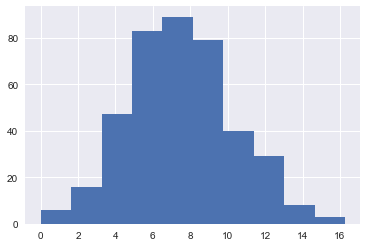

In [77]:
data['Sales'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x2247b9c9d30>,
 'caps': [<matplotlib.lines.Line2D at 0x2247d5c5760>,
 'boxes': [<matplotlib.lines.Line2D at 0x2247b84d430>],
 'medians': [<matplotlib.lines.Line2D at 0x2247d5c54f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2247d5c5ee0>],
 'means': []}

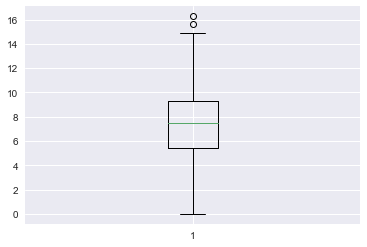

In [78]:
plt.boxplot(data['Sales'])

#### Converting Continous data to Categorical data of Class Variable i.e., Sales
##### We have divided the Sales into 3 categories... 0-6K = 1 , 6-12K = 2 , 12-18K = 3

In [79]:
sales_cat = pd.cut(data['Sales'], bins=(-1, 6, 12, 18), labels=(1, 2, 3))

In [80]:
sales_cat.head()

0    2
1    2
2    2
3    2
4    1
Name: Sales, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [81]:
sales_cat.isnull().sum()

0

In [82]:
pd.set_option('display.max_rows', 400)
data['Sales_category'] = sales_cat
data.sort_values(by='Sales', ascending = True)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
174,0.00,139,24,0,358,185,Medium,79,15,No,No,1
106,0.16,102,33,0,217,139,Medium,70,18,No,No,1
165,0.37,147,58,7,100,191,Bad,27,15,Yes,Yes,1
143,0.53,122,88,7,36,159,Bad,28,17,Yes,Yes,1
57,0.91,93,91,0,22,117,Bad,75,11,Yes,No,1
50,1.42,99,32,18,341,108,Bad,80,16,Yes,Yes,1
62,1.82,139,45,0,146,133,Bad,77,17,Yes,Yes,1
203,2.05,131,82,0,132,157,Bad,25,14,Yes,No,1
40,2.07,119,98,0,18,126,Bad,73,17,No,No,1
84,2.23,111,25,0,52,121,Bad,43,18,No,No,1


In [83]:
### Dropping Sales column, as we have converted the sales column to categorical Variable (Sales_category)
data.drop(['Sales'], axis= 1, inplace=True)

In [84]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,2
1,111,48,16,260,83,Good,65,10,Yes,Yes,2
2,113,35,10,269,80,Medium,59,12,Yes,Yes,2
3,117,100,4,466,97,Medium,55,14,Yes,Yes,2
4,141,64,3,340,128,Bad,38,13,Yes,No,1


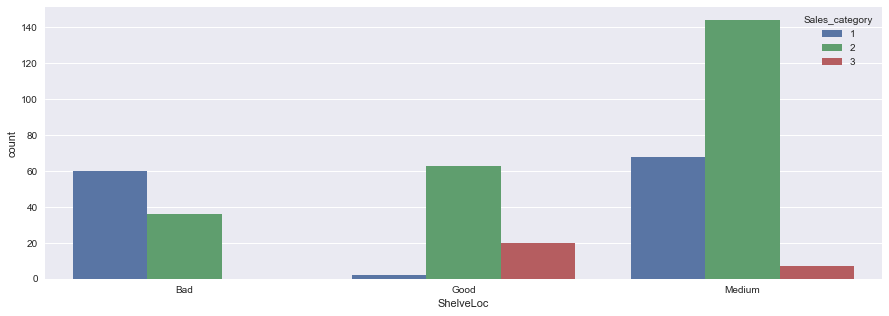

In [85]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'ShelveLoc', hue = 'Sales_category', data= data)

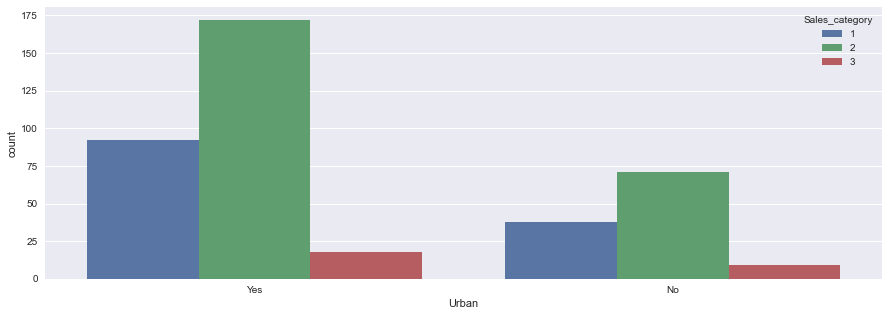

In [86]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Urban', hue = 'Sales_category', data= data)

In [87]:
data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [88]:
data['Sales_category'].unique()

[2, 1, 3]
Categories (3, int64): [1 < 2 < 3]

In [89]:
X = data.iloc[:, 0:10]
Y = data['Sales_category']

In [90]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No


In [91]:
Y.head()

0    2
1    2
2    2
3    2
4    1
Name: Sales_category, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [92]:
## One hot encoding
X = pd.get_dummies(X)
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [93]:
cols = X.columns
cols

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [94]:
target_var = Y.unique()
target_var

[2, 1, 3]
Categories (3, int64): [1 < 2 < 3]

In [95]:
## Normalising the data
def normal(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [96]:
X = normal(X)

In [97]:
## Splitting Data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state= 1)
X_train.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
82,0.755102,0.626263,0.137931,0.631263,0.688623,0.054545,0.875,0.0,1.0,0.0,0.0,1.0,0.0,1.0
367,0.183673,0.858586,0.000000,0.492986,0.173653,0.490909,0.875,0.0,1.0,0.0,0.0,1.0,1.0,0.0
179,0.683673,0.040404,0.103448,0.120240,0.550898,0.945455,1.000,0.0,0.0,1.0,0.0,1.0,0.0,1.0
27,0.214286,0.979798,0.000000,0.018036,0.497006,0.709091,0.875,0.0,0.0,1.0,0.0,1.0,1.0,0.0
89,0.520408,0.454545,0.103448,0.967936,0.568862,0.363636,0.750,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [98]:
X_test.shape

(100, 14)

In [99]:
Y_test.head()

398    1
125    2
328    1
339    2
172    2
Name: Sales_category, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [167]:
## Building Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [189]:
model_1 = DecisionTreeClassifier(criterion= 'gini', max_depth=3, random_state=4, ccp_alpha=0.02)

In [190]:
model_1.fit(X_train, Y_train)
predict_train = model_1.predict(X_train)
predict_train

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2], d

In [191]:
## Training Set accuracy
m1_acc_trn = np.mean(predict_train==Y_train)*100
m1_acc_trn

72.33333333333334

In [192]:
predict_test = model_1.predict(X_test)
predict_test

array([1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2], dtype=int64)

In [193]:
## Testing Set accuracy
m1_acc_tst = np.mean(predict_test==Y_test)*100
m1_acc_tst

65.0

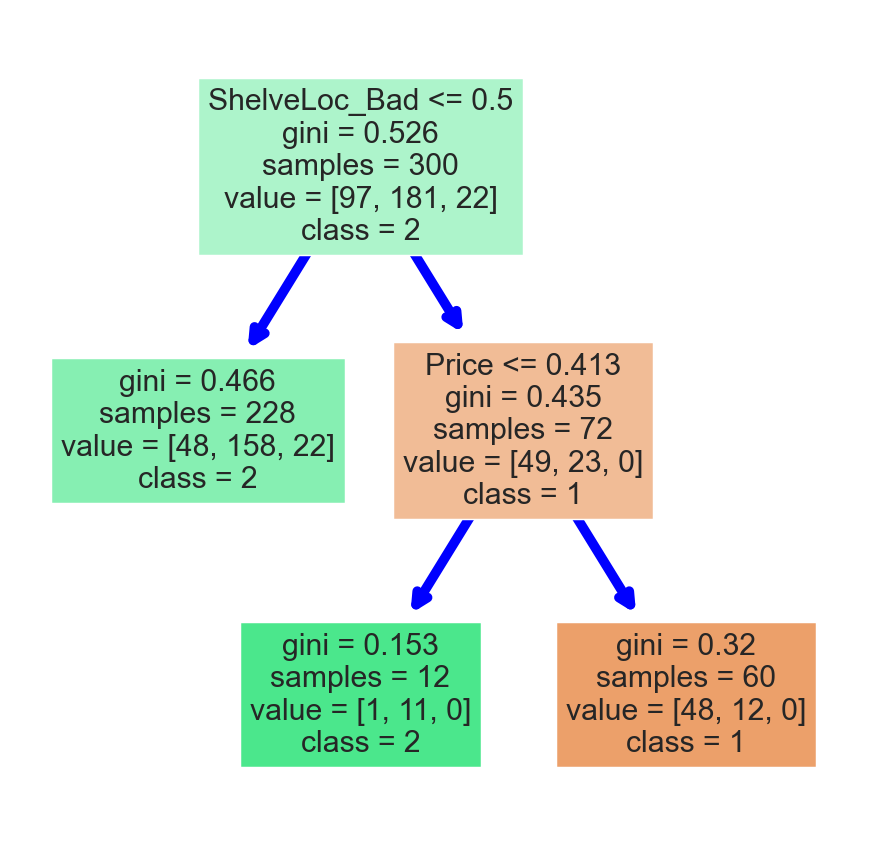

In [187]:
### Plotting Tree
plt.style.use('seaborn')
fn = cols
cn = ['1', '2', '3', '4']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (3,3), dpi = 350)
tree_plot = tree.plot_tree(model_1, feature_names=fn,
              class_names=cn,
              filled=True)
for o in tree_plot:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('blue')
        arrow.set_linewidth(2)


In [102]:
model_1.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.43977548,
       0.        , 0.        , 0.56022452, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [103]:
imp_feature = pd.Series(model_1.feature_importances_, index=fn).sort_values(ascending= False)
imp_feature

ShelveLoc_Bad       0.560225
Price               0.439775
US_Yes              0.000000
US_No               0.000000
Urban_Yes           0.000000
Urban_No            0.000000
ShelveLoc_Medium    0.000000
ShelveLoc_Good      0.000000
Education           0.000000
Age                 0.000000
Population          0.000000
Advertising         0.000000
Income              0.000000
CompPrice           0.000000
dtype: float64

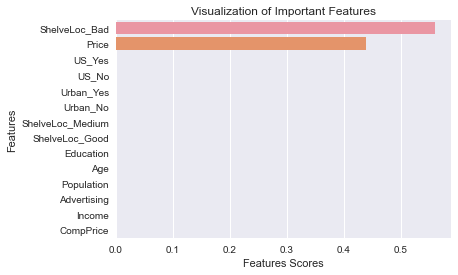

In [106]:
## Visualizing the best features
sns.barplot(x = imp_feature, y=imp_feature.index)
plt.xlabel('Features Scores')
plt.ylabel('Features')
plt.title('Visualization of Important Features')
plt.show()

#### Pruning Decision Tree

In [166]:
path = model_1.cost_complexity_pruning_path(X_train, Y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.01870413, 0.03424074, 0.06744581])

In [168]:
acc_train, acc_test = [], []

for i in alphas:
    model = DecisionTreeClassifier(ccp_alpha=i)
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    acc_train.append(accuracy_score(Y_train, Y_train_pred))
    acc_test.append(accuracy_score(Y_test, Y_test_pred))

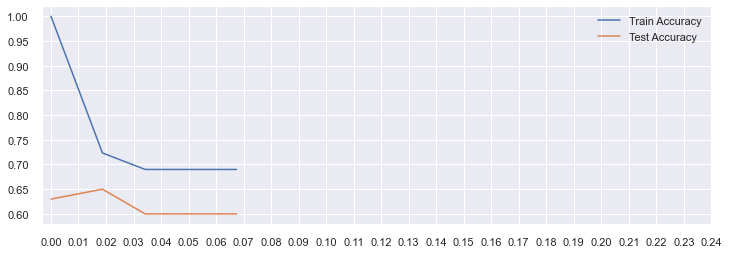

In [170]:
sns.set()
plt.figure(figsize=(12,4))
sns.lineplot(y=acc_train, x=alphas, label="Train Accuracy")
sns.lineplot(y=acc_test, x=alphas, label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00, 0.25, 0.01))
plt.show()

In [ ]:
#### As per the above plot we have got best accuracy for Train and Test at 0.02 alpha.

### Decision Tree Regression Model

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [57]:
x = df.iloc[:, 1:11]
y = df['Sales']
y.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

In [59]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No


In [126]:
x = pd.get_dummies(x)
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [155]:
x = normal(x)
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1) 

In [157]:
y_test.head()

398     5.94
125     9.34
328     3.15
339    11.54
172     9.03
Name: Sales, dtype: float64

In [158]:
model_2 = DecisionTreeRegressor()
model_2.fit(x_train, y_train)

DecisionTreeRegressor()

In [183]:
y_pred_train = model_2.predict(x_train)
y_pred_train

array([ 3.24,  6.71,  9.35,  6.43, 10.44,  5.21,  6.87,  3.98, 11.18,
        9.71,  5.87, 11.28,  7.68,  6.88,  4.17,  4.21,  6.56,  6.5 ,
        8.87, 16.27, 11.17,  3.63,  8.19, 10.27,  6.62,  4.42,  6.67,
        4.69, 10.07,  7.58, 10.5 ,  9.5 ,  5.55, 12.11,  9.39,  7.5 ,
        9.46,  6.59, 10.49,  7.78,  5.68,  5.04,  6.11,  8.77,  3.72,
       10.43,  4.67,  5.16,  6.67,  7.36,  8.43,  4.53,  4.99,  7.6 ,
        7.56, 10.51, 11.93,  4.11,  2.67,  9.  ,  7.54, 10.  ,  6.44,
        9.44,  6.89,  8.73,  7.44, 12.53, 10.04,  4.16,  4.55,  9.32,
        5.05,  3.47,  4.81, 11.48,  9.14,  5.81,  2.23,  6.54,  6.53,
        4.88, 12.57, 11.27,  5.86,  2.99,  8.25,  6.85,  5.4 ,  6.2 ,
        7.22,  3.91, 10.1 ,  8.67,  7.38,  8.77,  5.83, 11.07, 10.01,
        8.47, 10.21,  4.96, 12.44, 13.14,  8.85,  4.2 ,  9.32,  5.71,
        9.64,  5.47, 10.36,  4.56,  4.97,  7.3 ,  5.74,  4.38,  6.01,
       10.48, 10.62,  8.03,  2.07, 12.13,  6.2 ,  8.22,  7.99,  6.92,
        6.42, 12.85,

In [159]:
y_pred_test = model_2.predict(x_test)
y_pred_test


array([ 7.8 ,  7.8 ,  5.05, 12.13, 11.17, 10.07,  6.43,  9.01,  7.62,
        3.91,  5.56,  9.95,  8.98,  4.96,  7.5 ,  6.23,  5.01, 11.48,
        4.78,  6.56,  6.42,  6.43,  6.18,  5.71, 11.85,  7.54,  9.62,
        5.58, 10.44,  3.47,  7.64,  6.53,  5.17,  7.23,  5.71, 10.64,
        7.62,  6.98,  5.93, 10.48, 12.04,  5.73, 10.04,  3.72,  6.93,
        6.43,  9.  ,  3.72,  9.48,  3.58,  5.21,  7.5 ,  7.63, 10.  ,
       12.13,  9.31, 11.48,  8.54,  8.14, 11.19,  5.58,  5.53,  8.33,
        7.62,  8.54,  8.71,  5.71,  5.61, 16.27,  5.35,  9.44,  5.61,
        6.23,  9.32, 11.82,  7.36,  4.96,  3.13,  4.81,  5.56,  8.61,
        5.21, 10.44, 11.22,  7.56,  5.68,  4.17,  8.31,  4.96,  5.08,
       13.36,  4.81,  6.54,  7.5 ,  5.64, 10.21,  8.25,  5.86,  9.14,
        6.41, 10.61, 11.82,  5.08,  5.71,  6.41,  3.13, 10.49,  6.37,
        9.09,  7.49,  9.32,  8.54,  9.58,  7.5 ,  7.45,  4.12,  4.81,
        6.71, 11.91, 13.39])

In [160]:
m2_acc_trn = model_2.score(x_train, y_train)*100
m2_acc_trn

100.0

In [161]:
m2_acc_tst = model_2.score(x_test, y_test)*100
m2_acc_tst

26.941615824391917

In [162]:
mod_acc = {'Model': ['Model_1_Train', 'Model_1_Test', 'Model_2_Train', 'Model_2_Test'], 'Accuracy': [m1_acc_trn, m1_acc_tst,m2_acc_trn,m2_acc_tst ]}

In [163]:
acc_df = pd.DataFrame(mod_acc)
acc_df

,Model,Accuracy
0,Model_1_Train,72.666667
1,Model_1_Test,66.000000
2,Model_2_Train,100.000000
3,Model_2_Test,26.941616


#### Classifier Model is best compared to Regression model
